<h1>Immigrants find the best location for living and opening a Vietnamese Restaurant in Toronto </h1>

BY HAI NGUYEN

1.Problem Description: 

For this capstone project, assuming that immigrant family is planning to migrate to Canada and choose Toronto as their destination. One of the biggest concerns for immigrant families is to  choose area which has very crime rate but large population to open a business which is a Vietnamese Restaurant.

2.Project Requirement: 

Propose the best area for the immigrant family with following requirements:

•	Area must have low crime rate.

•	Area must not have the common venues are Asian Restaurants so low number of competitors.

•	Population must be greater than 25000.

3.Data: 

For analysis, we use the following data sources :

•	Toronto Crime by Neighbourhood: this source of  data is used to find neighborhoods which have low crime rate.

https://opendata.arcgis.com/datasets/af500b5abb7240399853b35a2362d0c0_0.geojson

•	Toronto Neighbourhoods Geo: this source of  data is used to plot Choropleth diagram and to see crime rate distribution among Toronto Neighborhoods. The data contains geographical coordinate (latitude, longitude) of 140 neighborhoods of Toronto.

https://open.toronto.ca/dataset/neighbourhoods/

•	Foursquare Developers Access to venue data: this source of  data is used to find venues for each Toronto Neighborhood which is then used for clustering method.

https://foursquare.com/


4.Data Analysis Tools: 

Python libraries such as: Pandas, Scikitlearn, Numpy, matplotlib, Folium, Foursquare API will be used for data analysis


Import all the required libraries required for the above data analysis

In [218]:
import numpy as np # library to handle data in a vectorized manner
import re
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from geopy.distance import geodesic

%matplotlib inline
import matplotlib.pyplot as plt
#creates a figure with 10 (width) x 5 (height) inches
plt.rcParams['figure.figsize'] = [14, 7]
print('Libraries imported.')

Libraries imported.


## Step1: Load Toronto Crime by Neighbourhood and find Neighbourhoods have lowest crime rate


In [219]:
url='https://opendata.arcgis.com/datasets/af500b5abb7240399853b35a2362d0c0_0.geojson'
r=requests.get(url).json()

In [220]:
toronto_crimedata = r['features']

In [221]:
#toronto_crimedata

Transform data to data frame

In [222]:
df_toronto_crimedata = pd.json_normalize(toronto_crimedata)
df_toronto_crimedata.head()

,type,properties.OBJECTID,properties.Neighbourhood,properties.Hood_ID,properties.Population,properties.Assault_2014,properties.Assault_2015,properties.Assault_2016,properties.Assault_2017,properties.Assault_2018,properties.Assault_2019,properties.Assault_AVG,properties.Assault_CHG,properties.Assault_Rate_2019,properties.AutoTheft_2014,properties.AutoTheft_2015,properties.AutoTheft_2016,properties.AutoTheft_2017,properties.AutoTheft_2018,properties.AutoTheft_2019,properties.AutoTheft_AVG,properties.AutoTheft_CHG,properties.AutoTheft_Rate_2019,properties.BreakandEnter_2014,properties.BreakandEnter_2015,properties.BreakandEnter_2016,properties.BreakandEnter_2017,properties.BreakandEnter_2018,properties.BreakandEnter_2019,properties.BreakandEnter_AVG,properties.BreakandEnter_CHG,properties.BreakandEnter_Rate_2019,properties.Homicide_2014,properties.Homicide_2015,properties.Homicide_2016,properties.Homicide_2017,properties.Homicide_2018,properties.Homicide_2019,properties.Homicide_AVG,properties.Homicide_CHG,properties.Homicide_Rate_2019,properties.Robbery_2014,properties.Robbery_2015,properties.Robbery_2016,properties.Robbery_2017,properties.Robbery_2018,properties.Robbery_2019,properties.Robbery_AVG,properties.Robbery_CHG,properties.Robbery_Rate_2019,properties.TheftOver_2014,properties.TheftOver_2015,properties.TheftOver_2016,properties.TheftOver_2017,properties.TheftOver_2018,properties.TheftOver_2019,properties.TheftOver_AVG,properties.TheftOver_CHG,properties.TheftOver_Rate_2019,properties.Shape__Area,properties.Shape__Length,geometry.type,geometry.coordinates
0,Feature,1,Yonge-St.Clair,097,12528,20,29,39,27,34,37,31.0,0.09,295.3,2,3,7,2,6,6,4.3,0.00,47.9,37,20,12,19,24,28,23.3,0.17,223.5,0,0,0,0,0,0,0.0,0.0,0.0,6,5,6,8,5,4,5.7,-0.20,31.9,4,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582,Polygon,"[[[-79.3911544450554, 43.6810810205658], [-79...."
1,Feature,2,York University Heights,027,27593,271,296,361,344,357,370,333.2,0.04,1340.9,105,100,105,92,92,144,106.3,0.57,521.9,107,139,98,105,122,108,113.2,-0.11,391.4,1,0,2,1,1,0,0.8,-1.0,0.0,59,84,70,75,88,79,75.8,-0.10,286.3,30,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326,Polygon,"[[[-79.5052468371003, 43.7598739861204], [-79...."
2,Feature,3,Lansing-Westgate,038,16164,44,80,68,85,75,72,70.7,-0.04,445.4,19,22,27,26,16,32,23.7,1.00,198.0,34,27,41,42,50,39,38.8,-0.22,241.3,0,0,0,0,10,0,1.7,-1.0,0.0,11,5,9,17,35,11,14.7,-0.69,68.1,4,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625,Polygon,"[[[-79.4399431314811, 43.7615578229059], [-79...."
3,Feature,4,Yorkdale-Glen Park,031,14804,106,136,174,161,175,209,160.2,0.19,1411.8,63,53,41,52,63,61,55.5,-0.03,412.1,51,57,66,58,64,84,63.3,0.31,567.4,1,1,1,1,2,1,1.2,-0.5,6.8,23,21,24,35,44,42,31.5,-0.05,283.7,23,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920,Polygon,"[[[-79.4396472248458, 43.7056099782244], [-79...."
4,Feature,5,Stonegate-Queensway,016,25051,88,71,76,95,87,82,83.2,-0.06,327.3,34,29,12,32,31,34,28.7,0.10,135.7,71,45,49,49,39,64,52.8,0.64,255.5,0,0,0,0,0,0,0.0,0.0,0.0,21,14,16,26,25,22,20.7,-0.12,87.8,7,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878,Polygon,"[[[-79.49258326535, 43.6474374941382], [-79.49..."


In [223]:
df_toronto_crimedata.columns

Index(['type', 'properties.OBJECTID', 'properties.Neighbourhood',
       'properties.Hood_ID', 'properties.Population',
       'properties.Assault_2014', 'properties.Assault_2015',
       'properties.Assault_2016', 'properties.Assault_2017',
       'properties.Assault_2018', 'properties.Assault_2019',
       'properties.Assault_AVG', 'properties.Assault_CHG',
       'properties.Assault_Rate_2019', 'properties.AutoTheft_2014',
       'properties.AutoTheft_2015', 'properties.AutoTheft_2016',
       'properties.AutoTheft_2017', 'properties.AutoTheft_2018',
       'properties.AutoTheft_2019', 'properties.AutoTheft_AVG',
       'properties.AutoTheft_CHG', 'properties.AutoTheft_Rate_2019',
       'properties.BreakandEnter_2014', 'properties.BreakandEnter_2015',
       'properties.BreakandEnter_2016', 'properties.BreakandEnter_2017',
       'properties.BreakandEnter_2018', 'properties.BreakandEnter_2019',
       'properties.BreakandEnter_AVG', 'properties.BreakandEnter_CHG',
       'propertie

Get average crime columns only

In [224]:
df_toronto_crimedata=df_toronto_crimedata[['properties.Neighbourhood','properties.Population','properties.Assault_AVG','properties.AutoTheft_AVG','properties.BreakandEnter_AVG','properties.Homicide_AVG','properties.Robbery_AVG','properties.TheftOver_AVG']]

In [225]:
df_toronto_crimedata.head()

,properties.Neighbourhood,properties.Population,properties.Assault_AVG,properties.AutoTheft_AVG,properties.BreakandEnter_AVG,properties.Homicide_AVG,properties.Robbery_AVG,properties.TheftOver_AVG
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0


In [226]:
df_toronto_crimedata.rename(columns={'properties.Neighbourhood':'Neighborhood','properties.Population':'Population','properties.Assault_AVG':'Assault_AVG','properties.AutoTheft_AVG':'AutoTheft_AVG','properties.BreakandEnter_AVG':'BreakandEnter_AVG','properties.Homicide_AVG':'Homicide_AVG','properties.Robbery_AVG':'Robbery_AVG','properties.TheftOver_AVG':'TheftOver_AVG'}, inplace=True)

In [227]:
df_toronto_crimedata.head()

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0


In [228]:
print('The dataframe has {} neighbourhoods.'.format(len(df_toronto_crimedata['Neighborhood'].unique())))

The dataframe has 140 neighbourhoods.


Add column with total crime rate for each neighborhood

In [229]:
df_toronto_crimedata['Total_Crime'] = df_toronto_crimedata.loc[:,'Assault_AVG':'TheftOver_AVG'].sum(axis = 1)

In [230]:
df_toronto_crimedata.head()

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3,665.6
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0,156.6
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5,334.2
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0,191.4


Find Crime rate per population = Total_Crime/Population

In [231]:
df_toronto_crimedata['Crime_Rate'] = round(df_toronto_crimedata['Total_Crime']/df_toronto_crimedata['Population']*100,2)

In [232]:
df_toronto_crimedata.head()

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55
1,York University Heights,27593,333.2,106.3,113.2,0.8,75.8,36.3,665.6,2.41
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,14.7,7.0,156.6,0.97
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,31.5,22.5,334.2,2.26
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0,191.4,0.76


Sort dataframe by crime rate

In [233]:
df_toronto_crimedata_sorted = df_toronto_crimedata.sort_values(by=['Crime_Rate'])
df_toronto_crimedata_sorted.reset_index(drop = True, inplace = True)
df_toronto_crimedata_sorted

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate
0,Mount Pleasant East,16775,34.7,9.8,29.7,0.0,7.2,3.5,84.9,0.51
1,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55
2,Steeles,24623,39.3,25.0,56.7,0.0,9.7,3.7,134.4,0.55
3,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,7.5,5.2,97.2,0.58
4,Lawrence Park North,14607,27.7,23.3,26.5,0.2,3.8,4.2,85.7,0.59
5,Pleasant View,15818,46.0,13.5,19.8,0.2,11.8,3.8,95.1,0.60
6,Willowdale East,50434,145.7,36.2,83.2,0.0,37.7,14.7,317.5,0.63
7,Centennial Scarborough,13362,46.5,9.5,19.2,0.3,7.5,2.0,85.0,0.64
8,Markland Wood,10554,20.7,12.3,25.8,0.0,7.8,2.2,68.8,0.65
9,Danforth East York,17180,65.8,9.3,27.2,0.0,5.8,2.8,110.9,0.65


Plot histogram to find see the No of Neighborhoor with crime rate

Text(0, 0.5, 'No of Neighbourhoods')

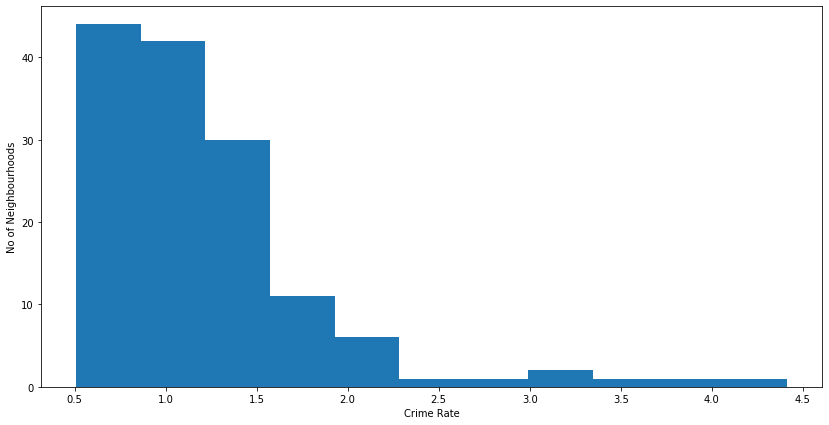

In [234]:
plt.hist(df_toronto_crimedata_sorted['Crime_Rate'],bins=11)
plt.xlabel("Crime Rate")
plt.ylabel("No of Neighbourhoods")

## Use Choropleth to have bigger the picture about crime rate among Toronto Neighborhood

Load Toronto Geo json file for Choropleth map

In [235]:
Toronto_geo_json = r'TorontGeo.geojson'
with open(Toronto_geo_json, "r") as jsonFile:
    data = json.load(jsonFile)
print (len(data['features']))

140


In [236]:
#data

AREA_NAME in json data has area code which is not necessary so we need to remove them by using re.sub and regular expression

In [237]:
for entries in range(len(data['features'])):
    s = data['features'][entries]['properties']['AREA_NAME'] 
    data['features'][entries]['properties']['AREA_NAME'] = re.sub(r"\(.*\)", "", s).strip()

In [238]:
# Get geograpical coordinate of Toronto
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
toronto_latitude = location.latitude
toronto_longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(toronto_latitude, toronto_longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [239]:
toronto_map = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=10)

tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(toronto_map)

choropleth = folium.Choropleth(
    geo_data=data,
    data=df_toronto_crimedata_sorted,
    columns=['Neighborhood', 'Crime_Rate'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate of Toronto Neighbourhood'
).add_to(toronto_map)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['AREA_NAME'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(toronto_map)

# display map
toronto_map

Transfrom Toront geo json file to data frame

In [240]:
df_geo1=pd.json_normalize(data['features'])
print(df_geo1.shape)
df_geo1.head()

(140, 18)


,type,properties._id,properties.AREA_ID,properties.AREA_ATTR_ID,properties.PARENT_AREA_ID,properties.AREA_SHORT_CODE,properties.AREA_LONG_CODE,properties.AREA_NAME,properties.AREA_DESC,properties.X,properties.Y,properties.LONGITUDE,properties.LATITUDE,properties.OBJECTID,properties.Shape__Area,properties.Shape__Length,geometry.type,geometry.coordinates
0,Feature,5601,25886861,25926662,49885,94,94,Wychwood,Wychwood,None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,Polygon,"[[[-79.4359157087306, 43.6801533947749], [-79...."
1,Feature,5602,25886820,25926663,49885,100,100,Yonge-Eglinton,Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,Polygon,"[[[-79.4109578382597, 43.7040828230148], [-79...."
2,Feature,5603,25886834,25926664,49885,97,97,Yonge-St.Clair,Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,Polygon,"[[[-79.391194825918, 43.681081122778], [-79.39..."
3,Feature,5604,25886593,25926665,49885,27,27,York University Heights,York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,Polygon,"[[[-79.5052879181893, 43.759873498781], [-79.5..."
4,Feature,5605,25886688,25926666,49885,31,31,Yorkdale-Glen Park,Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,Polygon,"[[[-79.4396873322608, 43.7056098189112], [-79...."


In [241]:
df_geo=df_geo1[['properties.AREA_NAME','properties.LATITUDE','properties.LONGITUDE']]
df_geo

,properties.AREA_NAME,properties.LATITUDE,properties.LONGITUDE
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883
4,Yorkdale-Glen Park,43.714672,-79.457108
5,Lambton Baby Point,43.657420,-79.496045
6,Lansing-Westgate,43.754271,-79.424748
7,Lawrence Park North,43.730060,-79.403978
8,Lawrence Park South,43.717212,-79.406039
9,Leaside-Bennington,43.703797,-79.366072


In [242]:
#Rename columns
df_geo.rename(columns={'properties.AREA_NAME':'Neighborhood','properties.LATITUDE':'Latitude','properties.LONGITUDE':'Longitude'}, inplace=True)
print(df_geo.shape)
df_geo.head()

(140, 3)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Latitude,Longitude
0,Wychwood,43.676919,-79.425515
1,Yonge-Eglinton,43.704689,-79.403590
2,Yonge-St.Clair,43.687859,-79.397871
3,York University Heights,43.765736,-79.488883
4,Yorkdale-Glen Park,43.714672,-79.457108


Let merge df_toronto_crimedata_sorted and df_geo

In [243]:
# Add Latitude and Longitude columns into df_toronto_crimedata_sorted
df_toronto_crimedata_sorted[['Latitude','Longitude']] = pd.DataFrame([[0.0,0.0]])
df_toronto_crimedata_sorted.astype({'Latitude': 'float64', 'Longitude': 'float64'})
df_toronto_crimedata_sorted.dtypes

Neighborhood          object
Population             int64
Assault_AVG          float64
AutoTheft_AVG        float64
BreakandEnter_AVG    float64
Homicide_AVG         float64
Robbery_AVG          float64
TheftOver_AVG        float64
Total_Crime          float64
Crime_Rate           float64
Latitude             float64
Longitude            float64
dtype: object

In [244]:
df_toronto_crimedata_sorted.reset_index(drop=True, inplace = True)
df_toronto_crimedata_sorted.head()

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude
0,Mount Pleasant East,16775,34.7,9.8,29.7,0.0,7.2,3.5,84.9,0.51,0.0,0.0
1,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,NaN,NaN
2,Steeles,24623,39.3,25.0,56.7,0.0,9.7,3.7,134.4,0.55,NaN,NaN
3,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,7.5,5.2,97.2,0.58,NaN,NaN
4,Lawrence Park North,14607,27.7,23.3,26.5,0.2,3.8,4.2,85.7,0.59,NaN,NaN


In [245]:
df_toronto_crimedata_sorted

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude
0,Mount Pleasant East,16775,34.7,9.8,29.7,0.0,7.2,3.5,84.9,0.51,0.0,0.0
1,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,NaN,NaN
2,Steeles,24623,39.3,25.0,56.7,0.0,9.7,3.7,134.4,0.55,NaN,NaN
3,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,7.5,5.2,97.2,0.58,NaN,NaN
4,Lawrence Park North,14607,27.7,23.3,26.5,0.2,3.8,4.2,85.7,0.59,NaN,NaN
5,Pleasant View,15818,46.0,13.5,19.8,0.2,11.8,3.8,95.1,0.60,NaN,NaN
6,Willowdale East,50434,145.7,36.2,83.2,0.0,37.7,14.7,317.5,0.63,NaN,NaN
7,Centennial Scarborough,13362,46.5,9.5,19.2,0.3,7.5,2.0,85.0,0.64,NaN,NaN
8,Markland Wood,10554,20.7,12.3,25.8,0.0,7.8,2.2,68.8,0.65,NaN,NaN
9,Danforth East York,17180,65.8,9.3,27.2,0.0,5.8,2.8,110.9,0.65,NaN,NaN


Insert Latitude and Longitude for df_toronto_crimedata_sorted

In [246]:
for i in range (df_toronto_crimedata_sorted.shape[0]):
    neighborhood_name = df_toronto_crimedata_sorted.iloc[i]['Neighborhood']
    latitude = df_geo.loc[df_geo.Neighborhood==neighborhood_name, 'Latitude'].values[0]
    longitude= df_geo.loc[df_geo.Neighborhood==neighborhood_name, 'Longitude'].values[0]
    #print (latitude, longitude)
    df_toronto_crimedata_sorted.loc[i,'Latitude'] = float(latitude)
    df_toronto_crimedata_sorted.loc[i,'Longitude'] = float(longitude)

In [247]:
df_toronto_crimedata_sorted.describe()

,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,19511.221429,132.646429,27.835000,51.548571,0.513571,25.647143,8.082857,246.273571,1.226714,43.708841,-79.400186
std,10033.589222,128.977375,35.047468,36.760413,0.517911,23.220601,9.427947,206.329192,0.636908,0.051274,0.102044
min,6577.000000,18.500000,2.700000,10.500000,0.000000,3.300000,1.200000,58.800000,0.510000,43.592362,-79.596356
25%,12019.500000,59.425000,13.275000,28.000000,0.200000,11.675000,3.500000,119.175000,0.807500,43.671009,-79.479794
50%,16749.500000,96.500000,18.800000,40.750000,0.300000,20.100000,5.200000,188.400000,1.100000,43.702021,-79.403989
75%,23854.500000,160.200000,30.975000,64.450000,0.725000,30.400000,8.350000,289.700000,1.450000,43.747294,-79.331097
max,65913.000000,851.800000,366.700000,247.300000,2.500000,135.700000,56.200000,1292.200000,4.410000,43.821201,-79.150843


In [248]:
df_toronto_crimedata_sorted

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude
0,Mount Pleasant East,16775,34.7,9.8,29.7,0.0,7.2,3.5,84.9,0.51,43.704852,-79.384924
1,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,43.687859,-79.397871
2,Steeles,24623,39.3,25.0,56.7,0.0,9.7,3.7,134.4,0.55,43.812959,-79.321207
3,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,7.5,5.2,97.2,0.58,43.703797,-79.366072
4,Lawrence Park North,14607,27.7,23.3,26.5,0.2,3.8,4.2,85.7,0.59,43.730060,-79.403978
5,Pleasant View,15818,46.0,13.5,19.8,0.2,11.8,3.8,95.1,0.60,43.786982,-79.334948
6,Willowdale East,50434,145.7,36.2,83.2,0.0,37.7,14.7,317.5,0.63,43.770602,-79.401484
7,Centennial Scarborough,13362,46.5,9.5,19.2,0.3,7.5,2.0,85.0,0.64,43.782376,-79.150843
8,Markland Wood,10554,20.7,12.3,25.8,0.0,7.8,2.2,68.8,0.65,43.633542,-79.573432
9,Danforth East York,17180,65.8,9.3,27.2,0.0,5.8,2.8,110.9,0.65,43.689468,-79.331403


Check to see if an Null or NaN in data frame

In [249]:
df_toronto_crimedata_sorted.isnull().sum()

Neighborhood         0
Population           0
Assault_AVG          0
AutoTheft_AVG        0
BreakandEnter_AVG    0
Homicide_AVG         0
Robbery_AVG          0
TheftOver_AVG        0
Total_Crime          0
Crime_Rate           0
Latitude             0
Longitude            0
dtype: int64

In [250]:
df_toronto_crimedata_sorted.isna().sum()

Neighborhood         0
Population           0
Assault_AVG          0
AutoTheft_AVG        0
BreakandEnter_AVG    0
Homicide_AVG         0
Robbery_AVG          0
TheftOver_AVG        0
Total_Crime          0
Crime_Rate           0
Latitude             0
Longitude            0
dtype: int64

Now filter Neighborhoods which have Crime Rate > 1

In [251]:
df_toronto_crimedata_filtered = df_toronto_crimedata_sorted[df_toronto_crimedata_sorted['Crime_Rate'] <= 1]
df_toronto_crimedata_filtered.head()

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude
0,Mount Pleasant East,16775,34.7,9.8,29.7,0.0,7.2,3.5,84.9,0.51,43.704852,-79.384924
1,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,43.687859,-79.397871
2,Steeles,24623,39.3,25.0,56.7,0.0,9.7,3.7,134.4,0.55,43.812959,-79.321207
3,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,7.5,5.2,97.2,0.58,43.703797,-79.366072
4,Lawrence Park North,14607,27.7,23.3,26.5,0.2,3.8,4.2,85.7,0.59,43.730060,-79.403978


In [252]:
print ('There are ', df_toronto_crimedata_filtered.shape[0], ' neighborhoods which have low crime rate (<1)')

There are  60  neighborhoods which have low crime rate (<1)


Visualize neighborhoods which haves low crime rate

In [253]:
# create map of lowest_crime Toronto using latitude and longitude values
toronto_map_filtered = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, population, total_crime, crime_rate in zip(df_toronto_crimedata_filtered['Latitude'], 
                                                                       df_toronto_crimedata_filtered['Longitude'], 
                                                                       df_toronto_crimedata_filtered['Neighborhood'],
                                                                       df_toronto_crimedata_filtered['Population'], 
                                                                       df_toronto_crimedata_filtered['Total_Crime'],
                                                                       df_toronto_crimedata_filtered['Crime_Rate']):
    label = 'Name = {}, Population = {}, Crime_Rate = {}'.format(neighborhood, population, crime_rate)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map_filtered)  
    
toronto_map_filtered

## Step2: Explore venues of Neighborhoos which have low crime rate

In [254]:
CLIENT_ID = 'XZ1N3DWFQZV32N2CPXSVQBTLRQJ2UU0IKACSVIMYKJCKGXPT' # your Foursquare ID
CLIENT_SECRET = 'C1L5OSMP30ILFTKWJQNYWNRPJMMAQY43KVW0XGN4LAOFPE1Y' # your Foursquare Secret
VERSION = '20200316' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XZ1N3DWFQZV32N2CPXSVQBTLRQJ2UU0IKACSVIMYKJCKGXPT
CLIENT_SECRET:C1L5OSMP30ILFTKWJQNYWNRPJMMAQY43KVW0XGN4LAOFPE1Y


Function to get venues of Toronto Neighborhood

In [255]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        print(name, ' has total venues found: ' ,len(results))
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Find the all venues for each neighborhood

In [256]:
LIMIT=100
radius=500
neighborhhod_lowcrimerate_venues = getNearbyVenues(names=df_toronto_crimedata_filtered['Neighborhood'],
                                   latitudes=df_toronto_crimedata_filtered['Latitude'],
                                   longitudes=df_toronto_crimedata_filtered['Longitude']
                                  )

Mount Pleasant East  has total venues found:  24
Yonge-St.Clair  has total venues found:  54
Steeles  has total venues found:  11
Leaside-Bennington  has total venues found:  18
Lawrence Park North  has total venues found:  48
Pleasant View  has total venues found:  14
Willowdale East  has total venues found:  1
Centennial Scarborough  has total venues found:  4
Markland Wood  has total venues found:  4
Danforth East York  has total venues found:  6
Agincourt North  has total venues found:  17
Bayview Woods-Steeles  has total venues found:  4
Maple Leaf  has total venues found:  5
Edenbridge-Humber Valley  has total venues found:  3
Guildwood  has total venues found:  5
Lawrence Park South  has total venues found:  8
L'Amoreaux  has total venues found:  18
Eringate-Centennial-West Deane  has total venues found:  6
Thorncliffe Park  has total venues found:  21
Bayview Village  has total venues found:  2
Forest Hill North  has total venues found:  23
Etobicoke West Mall  has total venues

In [257]:
neighborhhod_lowcrimerate_venues.shape


(700, 7)

In [258]:
neighborhhod_lowcrimerate_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mount Pleasant East,43.704852,-79.384924,Jules Cafe Patisserie,43.704138,-79.388413,Dessert Shop
1,Mount Pleasant East,43.704852,-79.384924,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
2,Mount Pleasant East,43.704852,-79.384924,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
3,Mount Pleasant East,43.704852,-79.384924,XO Gelato,43.705177,-79.388793,Dessert Shop
4,Mount Pleasant East,43.704852,-79.384924,Zee Grill,43.704985,-79.388476,Seafood Restaurant


In [259]:
neighborhhod_lowcrimerate_venues.isna().sum()

Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
dtype: int64

In [260]:
neighborhhod_lowcrimerate_venues[neighborhhod_lowcrimerate_venues['Neighborhood'] =='St.Andrew-Windfields']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


How many venues were returned for each neighborhood

In [261]:
neighborhhod_lowcrimerate_venues[['Neighborhood','Venue']].groupby('Neighborhood').count()

,Venue
Neighborhood,
Agincourt North,17
Alderwood,7
Banbury-Don Mills,21
Bathurst Manor,4
Bayview Village,2
Bayview Woods-Steeles,4
Bedford Park-Nortown,27
Broadview North,4
Casa Loma,10


In [262]:
print('There are {} uniques categories.'.format(len(neighborhhod_lowcrimerate_venues['Venue Category'].unique())))

There are 171 uniques categories.


One hot encoding for  K-Means clustering purpose

In [263]:
# one hot encoding
low_crimerate_onehot = pd.get_dummies(neighborhhod_lowcrimerate_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
low_crimerate_onehot['Neighborhood'] = neighborhhod_lowcrimerate_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [low_crimerate_onehot.columns[-1]] + list(low_crimerate_onehot.columns[:-1])
low_crimerate_onehot = low_crimerate_onehot[fixed_columns]

In [264]:
low_crimerate_onehot.head()

,Zoo Exhibit,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Store,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Castle,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fireworks Store,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Moving Target,Museum,Nail Salon,Neighborhood,Noodle House,Optical Shop,Other Great Outdoors,Pakistani Restaurant,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Tram Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mount Pleasant East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mount Pleasant East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mount Pleasant East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mount Pleasant East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [265]:
low_crimerate_grouped = low_crimerate_onehot.groupby('Neighborhood').mean().reset_index()
low_crimerate_grouped.head()

,Neighborhood,Zoo Exhibit,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Store,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Castle,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fireworks Store,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Moving Target,Museum,Nail Salon,Noodle House,Optical Shop,Other Great Outdoors,Pakistani Restaurant,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Tram Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Agincourt North,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,0.0,0.00,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.117647,0.0,0.000000,0.058824,0.000000,0.0,0.0,0.058824,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.058824,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.000000,0.058824,0.058824,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0
1,Alderwood,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.0,0.142857,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.142857,0.285714,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.

Print the top 5 most common venues for each neighborhood 

In [266]:
num_top_venues = 5

for hood in low_crimerate_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = low_crimerate_grouped[low_crimerate_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt North----
                venue  freq
0  Chinese Restaurant  0.12
1      Discount Store  0.06
2          Beer Store  0.06
3        Liquor Store  0.06
4  Frozen Yogurt Shop  0.06


----Alderwood----
                venue  freq
0         Pizza Place  0.29
1  Athletics & Sports  0.14
2        Dance Studio  0.14
3            Pharmacy  0.14
4   Convenience Store  0.14


----Banbury-Don Mills----
                venue  freq
0         Pizza Place  0.10
1         Coffee Shop  0.10
2  Italian Restaurant  0.05
3                 Spa  0.05
4       Movie Theater  0.05


----Bathurst Manor----
                  venue  freq
0                  Park  0.25
1            Playground  0.25
2     Convenience Store  0.25
3        Baseball Field  0.25
4  Other Great Outdoors  0.00


----Bayview Village----
                        venue  freq
0                       Trail   0.5
1  Construction & Landscaping   0.5
2        Other Great Outdoors   0.0
3          Miscellaneous Shop   0.0
4  Modern Eur

In [267]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

A dataframe to display the top 10 venues for each neighborhood.

In [268]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = low_crimerate_grouped['Neighborhood']

for ind in np.arange(low_crimerate_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(low_crimerate_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Chinese Restaurant,Frozen Yogurt Shop,Beer Store,Pharmacy,Pizza Place,Discount Store,Convenience Store,Clothing Store,Fast Food Restaurant,Sandwich Place
1,Alderwood,Pizza Place,Dance Studio,Convenience Store,Athletics & Sports,Pharmacy,Coffee Shop,Doctor's Office,French Restaurant,Food Truck,Food & Drink Shop
2,Banbury-Don Mills,Pizza Place,Coffee Shop,Furniture / Home Store,Pet Store,Pharmacy,Movie Theater,Clothing Store,Chocolate Shop,Sandwich Place,Cantonese Restaurant
3,Bathurst Manor,Baseball Field,Convenience Store,Park,Playground,Doctor's Office,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
4,Bayview Village,Construction & Landscaping,Trail,Zoo,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Flower Shop,Fish & Chips Shop


## Step3: Clusterting Neighborhoods to find the best Location

In [269]:
# set number of clusters
kclusters = 5

low_crime_grouped_clustering = low_crimerate_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(low_crime_grouped_clustering)

# check Cluster Label generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 0, 3, 0, 3, 1, 3, 0])

In [270]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

In [271]:
neighborhoods_venues_sorted.head()

,Cluster Label,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Agincourt North,Chinese Restaurant,Frozen Yogurt Shop,Beer Store,Pharmacy,Pizza Place,Discount Store,Convenience Store,Clothing Store,Fast Food Restaurant,Sandwich Place
1,3,Alderwood,Pizza Place,Dance Studio,Convenience Store,Athletics & Sports,Pharmacy,Coffee Shop,Doctor's Office,French Restaurant,Food Truck,Food & Drink Shop
2,3,Banbury-Don Mills,Pizza Place,Coffee Shop,Furniture / Home Store,Pet Store,Pharmacy,Movie Theater,Clothing Store,Chocolate Shop,Sandwich Place,Cantonese Restaurant
3,0,Bathurst Manor,Baseball Field,Convenience Store,Park,Playground,Doctor's Office,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
4,3,Bayview Village,Construction & Landscaping,Trail,Zoo,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Flower Shop,Fish & Chips Shop


In [272]:
low_crime_merged = df_toronto_crimedata_filtered

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
low_crime_merged = low_crime_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


In [273]:
low_crime_merged.head()

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mount Pleasant East,16775,34.7,9.8,29.7,0.0,7.2,3.5,84.9,0.51,43.704852,-79.384924,3.0,Dessert Shop,Pizza Place,Sandwich Place,Italian Restaurant,Gym,Café,Coffee Shop,Seafood Restaurant,Greek Restaurant,Gas Station
1,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,43.687859,-79.397871,3.0,Coffee Shop,Italian Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Grocery Store,Pizza Place,Pub,Bagel Shop,Bank
2,Steeles,24623,39.3,25.0,56.7,0.0,9.7,3.7,134.4,0.55,43.812959,-79.321207,3.0,Chinese Restaurant,Shopping Mall,Pharmacy,Pizza Place,Vietnamese Restaurant,BBQ Joint,Supermarket,Sushi Restaurant,Fast Food Restaurant,Korean Restaurant
3,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,7.5,5.2,97.2,0.58,43.703797,-79.366072,3.0,Coffee Shop,Park,Shopping Mall,Skating Rink,Fish & Chips Shop,Dessert Shop,Sporting Goods Shop,Burger Joint,Mexican Restaurant,Sandwich Place
4,Lawrence Park North,14607,27.7,23.3,26.5,0.2,3.8,4.2,85.7,0.59,43.730060,-79.403978,3.0,Sushi Restaurant,Bakery,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Cosmetics Shop,Asian Restaurant,Pub,Sandwich Place,Bank


In [274]:
low_crime_merged[low_crime_merged['Cluster Label'].isna()]

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,St.Andrew-Windfields,17812,50.0,20.2,78.7,0.5,7.2,8.5,165.1,0.93,43.756246,-79.379037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Willowridge-Martingrove-Richview,22156,90.3,44.3,43.0,0.7,27.3,3.7,209.3,0.94,43.683645,-79.554221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop St.Andrew-Windfields and Willowridge-Martingrove-Richview which have no venues found

In [275]:
low_crime_merged.dropna(inplace = True)

In [276]:
low_crime_merged.dtypes

Neighborhood               object
Population                  int64
Assault_AVG               float64
AutoTheft_AVG             float64
BreakandEnter_AVG         float64
Homicide_AVG              float64
Robbery_AVG               float64
TheftOver_AVG             float64
Total_Crime               float64
Crime_Rate                float64
Latitude                  float64
Longitude                 float64
Cluster Label             float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [277]:
low_crime_merged.head()

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mount Pleasant East,16775,34.7,9.8,29.7,0.0,7.2,3.5,84.9,0.51,43.704852,-79.384924,3.0,Dessert Shop,Pizza Place,Sandwich Place,Italian Restaurant,Gym,Café,Coffee Shop,Seafood Restaurant,Greek Restaurant,Gas Station
1,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,5.7,4.3,68.6,0.55,43.687859,-79.397871,3.0,Coffee Shop,Italian Restaurant,Sushi Restaurant,Restaurant,Sandwich Place,Grocery Store,Pizza Place,Pub,Bagel Shop,Bank
2,Steeles,24623,39.3,25.0,56.7,0.0,9.7,3.7,134.4,0.55,43.812959,-79.321207,3.0,Chinese Restaurant,Shopping Mall,Pharmacy,Pizza Place,Vietnamese Restaurant,BBQ Joint,Supermarket,Sushi Restaurant,Fast Food Restaurant,Korean Restaurant
3,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,7.5,5.2,97.2,0.58,43.703797,-79.366072,3.0,Coffee Shop,Park,Shopping Mall,Skating Rink,Fish & Chips Shop,Dessert Shop,Sporting Goods Shop,Burger Joint,Mexican Restaurant,Sandwich Place
4,Lawrence Park North,14607,27.7,23.3,26.5,0.2,3.8,4.2,85.7,0.59,43.730060,-79.403978,3.0,Sushi Restaurant,Bakery,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Cosmetics Shop,Asian Restaurant,Pub,Sandwich Place,Bank


In [278]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(low_crime_merged['Latitude'], low_crime_merged['Longitude'], low_crime_merged['Neighborhood'], low_crime_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [279]:
low_crime_merged[['Neighborhood','Cluster Label']].groupby('Cluster Label').count()

,Neighborhood
Cluster Label,
0.0,13
1.0,3
2.0,1
3.0,40
4.0,1


Cluster 0 - Filter neighborhoods have large population ( > 25000)

In [280]:
#Cluster 0
df_cluster0 = low_crime_merged.loc[low_crime_merged['Cluster Label'] == 0.0].reset_index(drop=True)
df_cluster0_filtered = df_cluster0[df_cluster0['Population'] > 25000]
df_cluster0_filtered

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Westminster-Branson,26274,111.0,27.7,45.2,0.0,14.5,4.7,203.1,0.77,43.778813,-79.452418,0.0,Gym / Fitness Center,American Restaurant,Park,Locksmith,Field,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Flower Shop
9,Parkwoods-Donalda,34805,159.7,31.5,65.2,0.3,29.5,6.2,292.4,0.84,43.755033,-79.330180,0.0,Food & Drink Shop,Park,Fireworks Store,Zoo,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Flower Shop,Fish & Chips Shop


Cluster 1 - Filter neighborhoods have large population ( > 25000)

In [281]:
df_cluster1 = low_crime_merged.loc[low_crime_merged['Cluster Label'] == 1.0].reset_index(drop=True)
df_cluster1_filtered = df_cluster1[df_cluster1['Population'] > 25000]
df_cluster1_filtered

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


Cluster 2 - Filter neighborhoods have large population ( > 25000)

In [282]:
df_cluster2 = low_crime_merged.loc[low_crime_merged['Cluster Label'] == 2.0].reset_index(drop=True)
df_cluster2_filtered = df_cluster2[df_cluster2['Population'] > 25000]
df_cluster2_filtered

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Willowdale East,50434,145.7,36.2,83.2,0.0,37.7,14.7,317.5,0.63,43.770602,-79.401484,2.0,Hotel,Zoo,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Flower Shop,Fish & Chips Shop,Fireworks Store


Cluster 3 - Filter neighborhoods have large population ( > 25000)

In [283]:
df_cluster3 = low_crime_merged.loc[low_crime_merged['Cluster Label'] == 3.0].reset_index(drop=True)
df_cluster3_filtered = df_cluster3[df_cluster3['Population'] > 25000]
df_cluster3_filtered

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Agincourt North,29113,74.8,29.7,53.5,0.2,30.2,4.7,193.1,0.66,43.805441,-79.266712,3.0,Chinese Restaurant,Frozen Yogurt Shop,Beer Store,Pharmacy,Pizza Place,Discount Store,Convenience Store,Clothing Store,Fast Food Restaurant,Sandwich Place
11,L'Amoreaux,43993,163.0,25.8,72.8,0.5,43.7,5.7,311.5,0.71,43.795716,-79.314084,3.0,Chinese Restaurant,Pizza Place,Bank,Hotpot Restaurant,Gym Pool,Electronics Store,Noodle House,Coffee Shop,Sandwich Place,Breakfast Spot
18,Mount Pleasant West,29658,115.5,7.8,72.5,0.5,13.7,6.0,216.0,0.73,43.704435,-79.393360,3.0,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Dessert Shop,Pizza Place,Restaurant,Middle Eastern Restaurant,Bar,French Restaurant
19,Rouge,46496,173.3,50.5,72.3,0.8,32.3,11.8,341.0,0.73,43.821201,-79.186343,3.0,Zoo Exhibit,Other Great Outdoors,Zoo,Restaurant,Food & Drink Shop,Dessert Shop,Tram Station,Fast Food Restaurant,Theme Park Ride / Attraction,Gift Shop
20,Banbury-Don Mills,27695,80.5,21.8,73.2,0.0,15.0,10.3,200.8,0.73,43.737657,-79.349718,3.0,Pizza Place,Coffee Shop,Furniture / Home Store,Pet Store,Pharmacy,Movie Theater,Clothing Store,Chocolate Shop,Sandwich Place,Cantonese Restaurant
24,Tam O'Shanter-Sullivan,27446,109.7,23.0,62.7,0.7,27.7,5.5,229.3,0.84,43.780130,-79.302919,3.0,Pizza Place,Pharmacy,Bank,Fried Chicken Joint,Chinese Restaurant,Gas Station,Fast Food Restaurant,Thai Restaurant,Rental Car Location,Noodle House
33,Don Valley Village,27051,127.7,29.8,52.0,0.3,30.2,9.5,249.5,0.92,43.783294,-79.353644,3.0,Fast Food Restaurant,Bakery,Caribbean Restaurant,Sandwich Place,Grocery Store,Beer Store,Baseball Field,Pizza Place,Fried Chicken Joint,Fireworks Store
39,Malvern,43794,278.2,47.2,52.3,1.7,50.7,9.0,439.1,1.00,43.803658,-79.222517,3.0,Fast Food Restaurant,Pharmacy,Restaurant,Bubble Tea Shop,Sandwich Place,Pizza Place,Doctor's Office,Department Store,Food Truck,Food & Drink Shop


In [284]:
df_cluster3_filtered.shape

(8, 23)

Cluster 4 - Filter neighborhoods have large population ( > 25000)

In [285]:
df_cluster4 = low_crime_merged.loc[low_crime_merged['Cluster Label'] == 4.0].reset_index(drop=True)
df_cluster4_filtered = df_cluster4[df_cluster4['Population'] > 25000]
df_cluster4_filtered

,Neighborhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Total_Crime,Crime_Rate,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,20.7,6.0,191.4,0.76,43.635518,-79.501128,4.0,Baseball Field,Gaming Cafe,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop,Flower Shop,Fish & Chips Shop,Fireworks Store


## Discussion

After filtering cluster in which we choose neighborhoods have large population (> 25000).

1. Cluster 0 (Red): has 2 neighborhoods which are Westminster-Branson	and Parkwoods-Donald. These neighborhoods have good population density and most common venues in these areas are Western Restaurant styles (Fast Food, French restaurants).

2. Cluster 1 (Purple): there is on neighborhood found.

3. Cluster 2 (Blue): 1 neighborhood found which is Willowdale East, this neighborhood has large population (50000). Hotel and other entertainment facilities are the most common venues. This is the best neighborhood to open Vietnamese restaurant with very low competitor. Furthermore, it has homicide rate is 0 so immigrant likely to choose area for living and open a Vietnamese restaurant

4. Cluster 3 (Green): 8 neighborhoods found in which Asian Restaurant is the most common venues (Chinese Restaurant, Vietnamese Restaurant). We should not choose this cluster because of many competitors

5. Cluster 4 (Orange): 1 neighborhood found which is Stonegate-Queensway. This is also a good location to open restaurant, but it has low population (25051)

Based on the observation, the Willowdale East area of Cluster 2 is the best location
